# State Small Business Credit Initiative

This SSBCI Transactions Dataset is the set of files reporting the transaction level data, both
required and optional, for all transactions conducted through the SSBCI program from
inception in 2011 through December 31, 2016. This dataset categorizes transactions by
program type, and includes the total financing amount, the amount of federal dollars
expended, the date of the transaction, and the industry, zip code, and FTEs of the business
receiving financing at the point of transaction, among other fields. The data files are
available for public use

In [174]:
import pandas as pd

In [175]:
# Load the dataset
df = pd.read_csv("../Datasets/Companies/SSBCI-Transactions-Dataset.csv")

# Display the first few rows of the dataset
print(df.head())

  state_id          state_name  year_reported             program_name  \
0       AK  Alaska - Anchorage           2013  49th State Venture Fund   
1       AK  Alaska - Anchorage           2013  49th State Venture Fund   
2       AK  Alaska - Anchorage           2013  49th State Venture Fund   
3       AK  Alaska - Anchorage           2014  49th State Venture Fund   
4       AK  Alaska - Anchorage           2014  49th State Venture Fund   

      program_type      unique_id disbursement_date  loan_investment_amount  \
0  Venture Capital  AK_2013_VCP_1          3/1/2013                180000.0   
1  Venture Capital  AK_2013_VCP_2         7/13/2013               2400000.0   
2  Venture Capital  AK_2013_VCP_3        12/30/2013                265000.0   
3  Venture Capital  AK_2014_VCP_1         4/11/2014                199500.0   
4  Venture Capital  AK_2014_VCP_2         5/15/2014                125000.0   

   ssbci_original_funds  nonprivate_amount  ...  optional_revenue  \
0          

In [176]:
# Get the dimensions of the dataset
print("Dataset dimensions:", df.shape)

Dataset dimensions: (21962, 49)


In [177]:
# Get concise summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21962 entries, 0 to 21961
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_id                       21962 non-null  object 
 1   state_name                     21962 non-null  object 
 2   year_reported                  21962 non-null  int64  
 3   program_name                   21962 non-null  object 
 4   program_type                   21962 non-null  object 
 5   unique_id                      21962 non-null  object 
 6   disbursement_date              21962 non-null  object 
 7   loan_investment_amount         21962 non-null  float64
 8   ssbci_original_funds           21962 non-null  float64
 9   nonprivate_amount              21962 non-null  float64
 10  concurrent_private_financing   21962 non-null  float64
 11  borrower_insurance_premium     21962 non-null  float64
 12  lender_insurance_premium       21962 non-null 

In [178]:
# Get data types of all columns
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
state_id                          object
state_name                        object
year_reported                      int64
program_name                      object
program_type                      object
unique_id                         object
disbursement_date                 object
loan_investment_amount           float64
ssbci_original_funds             float64
nonprivate_amount                float64
concurrent_private_financing     float64
borrower_insurance_premium       float64
lender_insurance_premium         float64
guaranteed_amount                float64
collateral_support               float64
ssbci_recycled_funds             float64
subsequent_private_financing     float64
zip_code                           int64
metro_type                        object
LMI_type                          object
revenue                          float64
full_time_employees              float64
naics_code                         int64
year_incorporated                 

In [179]:
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
       year_reported  loan_investment_amount  ssbci_original_funds  \
count   21962.000000            2.196200e+04          2.196200e+04   
mean     2014.035015            3.356207e+05          5.278746e+04   
std         1.552888            1.074323e+06          1.902404e+05   
min      2011.000000            5.000000e+02          0.000000e+00   
25%      2013.000000            1.000000e+04          3.227850e+02   
50%      2014.000000            3.150000e+04          1.249500e+03   
75%      2015.000000            2.000000e+05          1.685625e+04   
max      2016.000000            2.000000e+07          5.000000e+06   

       nonprivate_amount  concurrent_private_financing  \
count       2.196200e+04                  2.196200e+04   
mean        2.411061e+03                  4.388549e+04   
std         4.044049e+04                  6.192055e+05   
min         0.000000e+00                  0.000000e+00   
25%         0.000000e+00             

In [180]:
print("Unique values and their counts for Year reported:")
print(df["year_reported"].value_counts())

Unique values and their counts for Year reported:
year_reported
2016    5200
2015    4459
2014    3910
2013    3817
2012    3455
2011    1121
Name: count, dtype: int64


In [181]:
print("Unique count for Unique id :")
print(df["unique_id"].value_counts().sum())

Unique count for Unique id :
21962


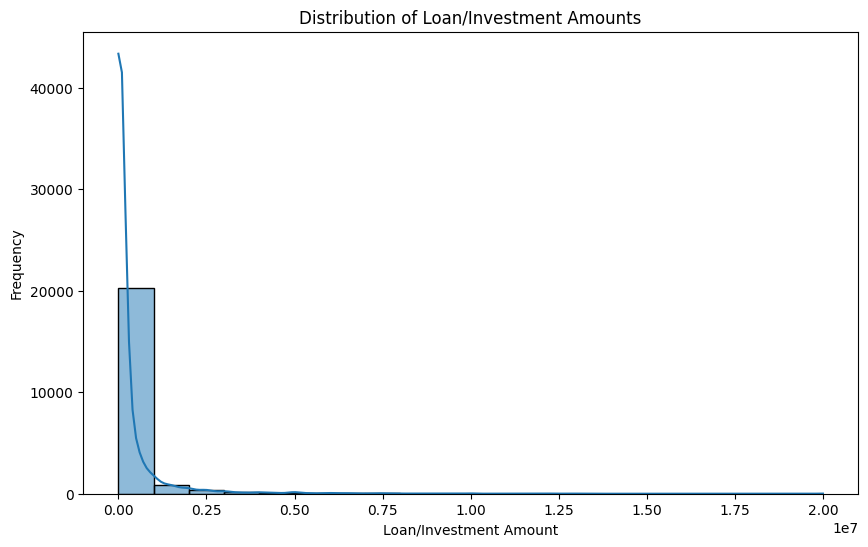

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of loan/investment amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_investment_amount'], bins=20, kde=True)
plt.title('Distribution of Loan/Investment Amounts')
plt.xlabel('Loan/Investment Amount')
plt.ylabel('Frequency')
plt.show()

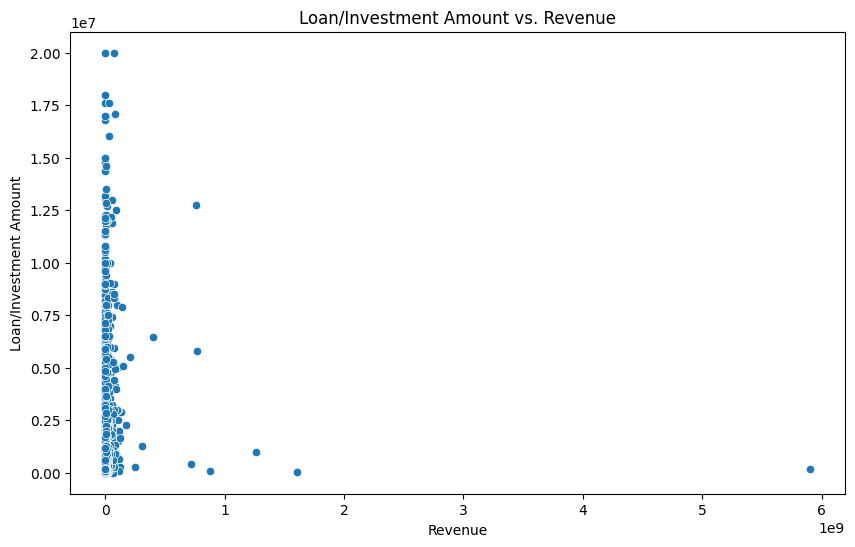

In [183]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='revenue', y='loan_investment_amount')
plt.title('Loan/Investment Amount vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Loan/Investment Amount')
plt.show()

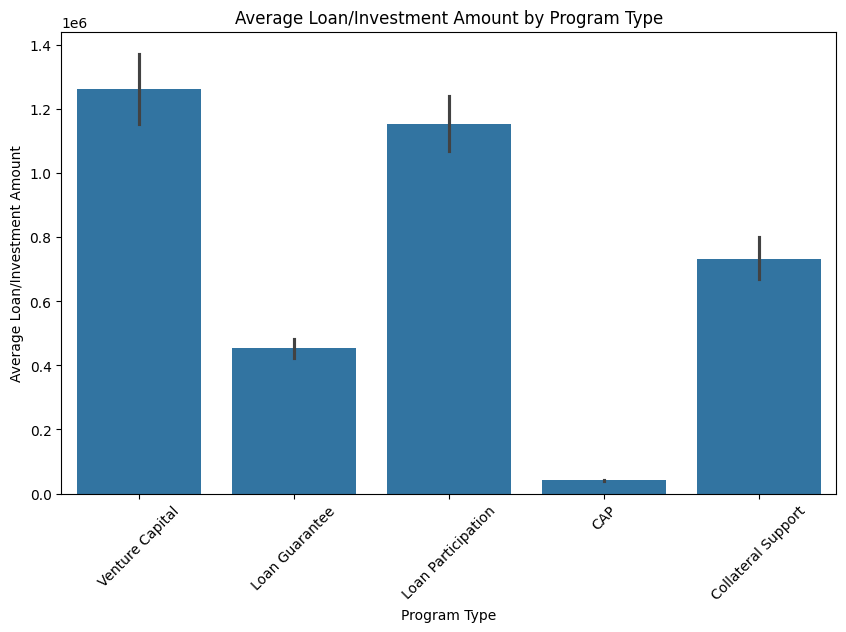

In [184]:
import numpy as np

# Grouped bar chart of average loan/investment amount by program type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='program_type', y='loan_investment_amount', estimator=np.mean)
plt.title('Average Loan/Investment Amount by Program Type')
plt.xlabel('Program Type')
plt.ylabel('Average Loan/Investment Amount')
plt.xticks(rotation=45)
plt.show()

In [185]:
# Group data by lender type and calculate loan statistics
loan_stats_by_lender = df.groupby('lender_type')['loan_investment_amount'].agg(['count', 'sum', 'mean']).reset_index()

# Sort data by total loan amount in descending order
loan_stats_by_lender = loan_stats_by_lender.sort_values(by='sum', ascending=False)

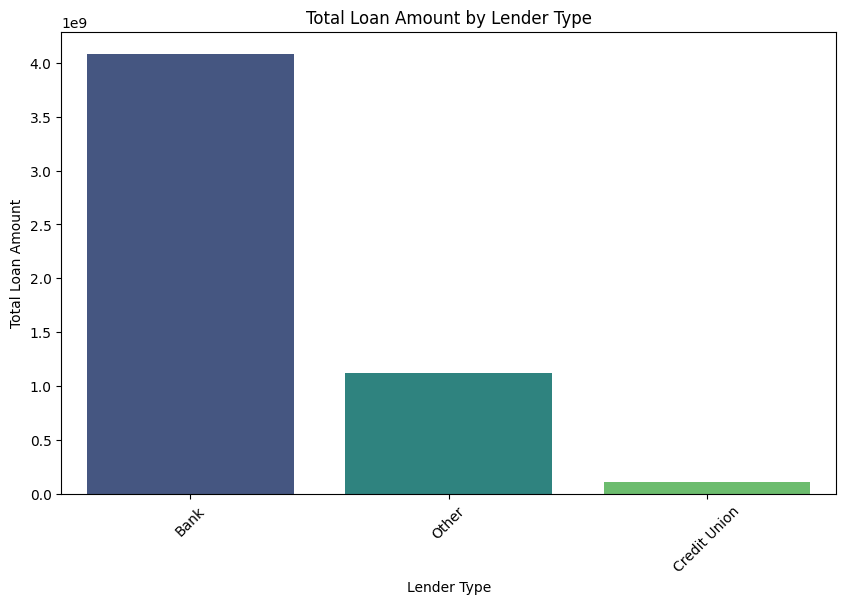

In [186]:
# Visualize the influence of lender types on loans
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_stats_by_lender, x='lender_type', y='sum', hue='lender_type', palette='viridis', legend=False)
plt.title('Total Loan Amount by Lender Type')
plt.xlabel('Lender Type')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.show()


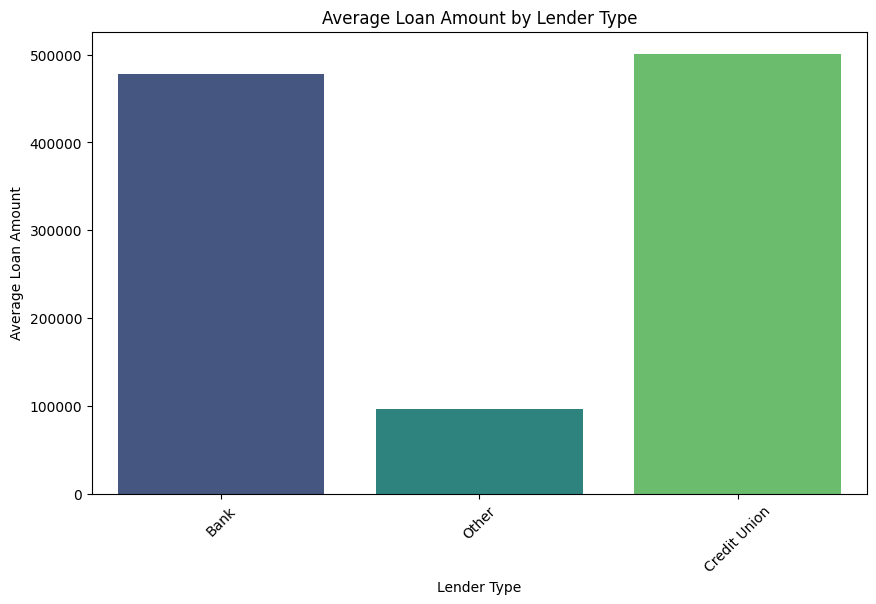

In [187]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_stats_by_lender, x='lender_type', y='mean', hue='lender_type', palette='viridis', legend=False)
plt.title('Average Loan Amount by Lender Type')
plt.xlabel('Lender Type')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.show()

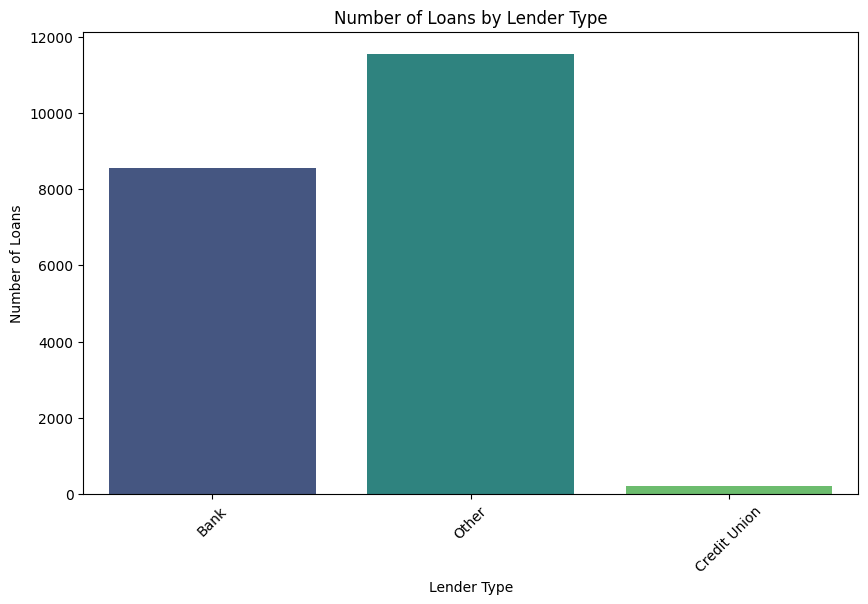

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_stats_by_lender, x='lender_type', y='count', hue='lender_type', palette='viridis', legend=False)
plt.title('Number of Loans by Lender Type')
plt.xlabel('Lender Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()

In [189]:
# Count the number of loans where optional_dollars_lost is not zero
lost_funds_loans_count = df[df['optional_dollars_lost'] != 0]['optional_dollars_lost'].count()
repaid_loans_count = df[df['optional_dollars_lost'] == 0]['optional_dollars_lost'].count()

# Count the total number of loans with data
total_loans_count = repaid_loans_count + lost_funds_loans_count
percent_lost_funds = (lost_funds_loans_count / total_loans_count) * 100
percent_repaid = (repaid_loans_count / total_loans_count) * 100

print("Total number of loans:", total_loans_count)
print("=====================================================")
print("Number of loans with funds lost:", lost_funds_loans_count)
print("Number of loans that have been repaid:", repaid_loans_count)
print("=====================================================")
# Calculate percentages
print("Percentage of loans with funds lost: {:.2f}%".format(percent_lost_funds))
print("Percentage of loans that have been repaid: {:.2f}%".format(percent_repaid))

Total number of loans: 1840
Number of loans with funds lost: 277
Number of loans that have been repaid: 1563
Percentage of loans with funds lost: 15.05%
Percentage of loans that have been repaid: 84.95%


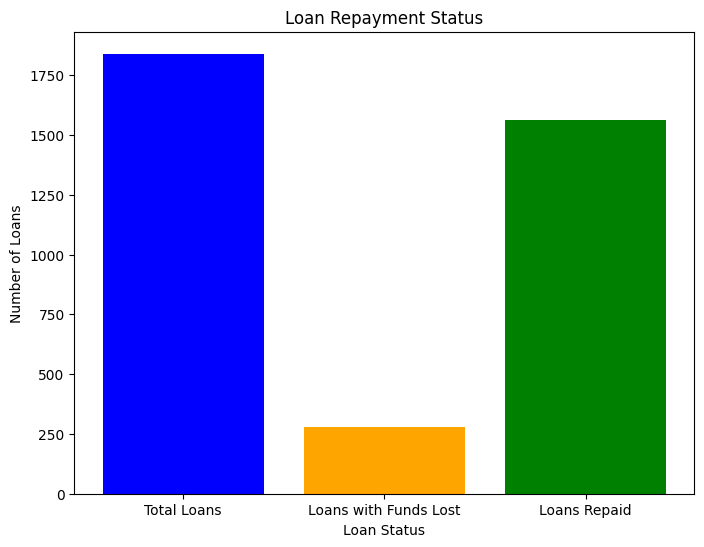

In [190]:
# Define data
categories = ['Total Loans', 'Loans with Funds Lost', 'Loans Repaid']
counts = [total_loans_count, lost_funds_loans_count, repaid_loans_count]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'orange', 'green'])
plt.title('Loan Repayment Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

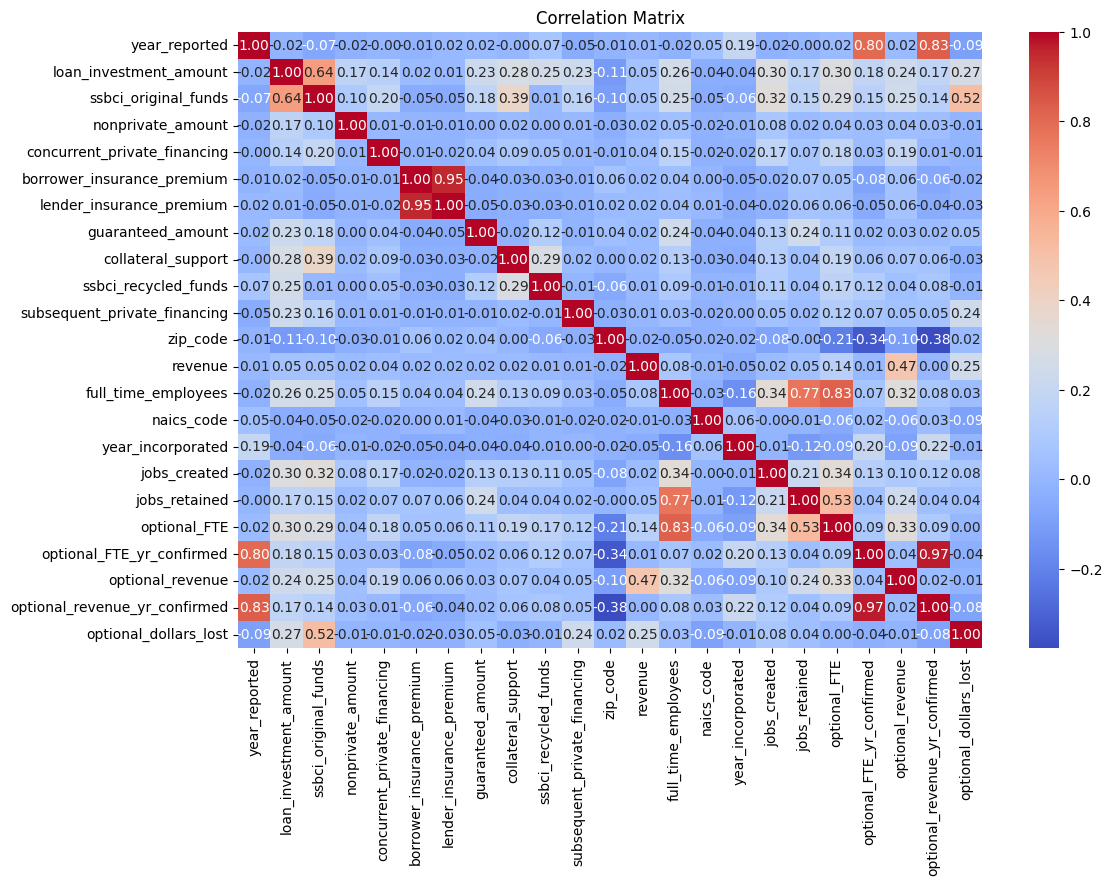

In [191]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

    * Loan_investment_amount 
is positively correlated with "ssbci_original_funds" , "nonprivate_amount", "guaranteed_amount", "collateral_support", "subsequent_private_financing", "optional_revenue", and "optional_revenue_yr_confirmed" 
This means that these variables tend to increase or decrease together.


    * Borrower_insurance_premium 
is highly correlated with "lender_insurance_premium"
This is not surprising, as these two variables are both measures of insurance costs.


    * Jobs_created 
is positively correlated with "jobs_retained" 
This means that businesses that create more jobs also tend to retain more jobs.


    * Optional_FTE 
is highly correlated with "optional_FTE_yr_confirmed"
This suggests that these two variables are measuring the same thing.

## DATA CLEANING

In [192]:
# Check the number of columns
num_columns = len(df.columns)
print("Number of columns:", num_columns)

Number of columns: 49


In [193]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [194]:
df.columns

Index(['state_id', 'state_name', 'year_reported', 'program_name',
       'program_type', 'unique_id', 'disbursement_date',
       'loan_investment_amount', 'ssbci_original_funds', 'nonprivate_amount',
       'concurrent_private_financing', 'borrower_insurance_premium',
       'lender_insurance_premium', 'guaranteed_amount', 'collateral_support',
       'ssbci_recycled_funds', 'subsequent_private_financing', 'zip_code',
       'metro_type', 'LMI_type', 'revenue', 'full_time_employees',
       'naics_code', 'year_incorporated', 'jobs_created', 'jobs_retained',
       'trans_type', 'lender_name', 'lender_type', 'lender_type_category',
       'CDFI_type', 'MDI_type', 'VC_cat', 'optional_woman_owned',
       'optional_minority_owned', 'optional_veteran_owned', 'optional_FTE',
       'optional_FTE_yr_confirmed', 'optional_primary_use_of_funds',
       'optional_revenue', 'optional_revenue_yr_confirmed', 'optional_active',
       'optional_active_no', 'optional_active_unknown',
       'option

In [196]:
columns_to_drop = ['state_id', 'state_name','year_reported', 'program_name', 'program_type','nonprivate_amount', 'concurrent_private_financing', 'ssbci_recycled_funds','subsequent_private_financing',
                   'ssbci_recycled_funds','zip_code', 'trans_type' ,'year_incorporated', 'lender_name', 'lender_type', 'CDFI_type', 'MDI_type',
                   'VC_cat','optional_business_city', 'optional_business_state', 'optional_coinvestment_source','optional_woman_owned',
                   'optional_minority_owned', 'optional_veteran_owned', 'optional_FTE','optional_revenue','optional_dollars_lost','optional_business_city', 'optional_business_state',
                   'optional_coinvestment_source',]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining columns after dropping irrelevant columns:")
print(df.columns)



Remaining columns after dropping irrelevant columns:
Index(['unique_id', 'disbursement_date', 'loan_investment_amount',
       'ssbci_original_funds', 'borrower_insurance_premium',
       'lender_insurance_premium', 'guaranteed_amount', 'collateral_support',
       'metro_type', 'LMI_type', 'revenue', 'full_time_employees',
       'naics_code', 'jobs_created', 'jobs_retained', 'lender_type_category',
       'optional_FTE_yr_confirmed', 'optional_primary_use_of_funds',
       'optional_revenue_yr_confirmed', 'optional_active',
       'optional_active_no', 'optional_active_unknown', 'optional_stage'],
      dtype='object')


In [197]:
# Combine columns into a single column
df['active_status'] = df['optional_active']

# Update values based on priority
unknown_values = ['Attempted to confirm operations, but unable', 'Did not attempt to confirm operations', '']
df.loc[df['active_status'] == 'No', 'active_status'] = df['optional_active_no']
df.loc[df['active_status'].isna(), 'active_status'] = df['optional_active_unknown']



# Drop the original columns
df = df.drop(columns=['optional_active', 'optional_active_no', 'optional_active_unknown'])

# Display the updated DataFrame
frequency = df['active_status'].value_counts()
print(frequency)


active_status
Yes                                            3138
Did not attempt to confirm operations          2047
Loss                                            126
Other                                            60
Sold                                             44
Bankrupt                                         41
Exit                                             33
Attempted to confirm operations, but unable      32
Moved                                             7
Name: count, dtype: int64


In [198]:
# Function to extract program type from 'unique_id'
def extract_program_type(unique_id):
    if 'LGP' in unique_id:
        return 'Loan Guarantee'
    elif 'CSP' in unique_id:
        return 'Collateral Support'
    else:
        return None

In [199]:
# Combine 'guaranteed_amount' and 'collateral_support' based on 'unique_id'
df['support_amount'] = df.apply(lambda row: row['guaranteed_amount'] if 'LGP' in row['unique_id'] else row['collateral_support'], axis=1)

# Drop the original 'guaranteed_amount' and 'collateral_support' columns
df.drop(['guaranteed_amount', 'collateral_support'], axis=1, inplace=True)


In [200]:
# # Check for missing values
# print("Number of duplicate rows:",df.isnull().sum())

# Check for missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# Get data types of columns with missing values
missing_columns_types = df[missing_columns.index].dtypes

print("Columns with missing values, their counts, and data types:")
print(pd.concat([missing_columns, missing_columns_types], axis=1, keys=['Missing Count', 'Data Type']))


Columns with missing values, their counts, and data types:
                               Missing Count Data Type
lender_type_category                    1677    object
optional_FTE_yr_confirmed              11286   float64
optional_primary_use_of_funds          11684    object
optional_revenue_yr_confirmed          12466   float64
optional_stage                         20995    object
active_status                          16434    object


In [201]:
# Check for empty rows
empty_rows = df.isnull().all(axis=1)

# Print the number of empty rows
print("Number of empty rows:", empty_rows.sum())

# Display the empty rows
if empty_rows.any():
    print("Empty rows:")
    print(df[empty_rows])
else:
    print("No empty rows found.")


Number of empty rows: 0
No empty rows found.


In [202]:
print(len(df.columns))
print(df.info())

20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21962 entries, 0 to 21961
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      21962 non-null  object 
 1   disbursement_date              21962 non-null  object 
 2   loan_investment_amount         21962 non-null  float64
 3   ssbci_original_funds           21962 non-null  float64
 4   borrower_insurance_premium     21962 non-null  float64
 5   lender_insurance_premium       21962 non-null  float64
 6   metro_type                     21962 non-null  object 
 7   LMI_type                       21962 non-null  object 
 8   revenue                        21962 non-null  float64
 9   full_time_employees            21962 non-null  float64
 10  naics_code                     21962 non-null  int64  
 11  jobs_created                   21962 non-null  float64
 12  jobs_retained                  21962 non-nu

In [204]:
# Define the remaining categorical, numeric, and text columns
categorical_columns = ['lender_type_category', 'optional_primary_use_of_funds', 'optional_stage']
numeric_columns = ['optional_FTE_yr_confirmed', 'optional_revenue_yr_confirmed']
text_columns = ['active_status']

# Handle missing values for categorical columns
for column in categorical_columns:
    if column in df.columns:  # Check if the column still exists
        df[column].fillna(df[column].mode()[0], inplace=True)

# Handle missing values for numeric columns
for column in numeric_columns:
    if column in df.columns:
        df[column].fillna(df[column].median(), inplace=True)

# Handle missing values for text columns
for column in text_columns:
    if column in df.columns:
        df[column].fillna("Unknown", inplace=True)  # Replace missing values with "Unknown"


In [205]:
print("Remaining columns:",df.columns)
print("Number of Remaining columns:",len(df.columns))

Remaining columns: Index(['unique_id', 'disbursement_date', 'loan_investment_amount',
       'ssbci_original_funds', 'borrower_insurance_premium',
       'lender_insurance_premium', 'metro_type', 'LMI_type', 'revenue',
       'full_time_employees', 'naics_code', 'jobs_created', 'jobs_retained',
       'lender_type_category', 'optional_FTE_yr_confirmed',
       'optional_primary_use_of_funds', 'optional_revenue_yr_confirmed',
       'optional_stage', 'active_status', 'support_amount'],
      dtype='object')
Number of Remaining columns: 20


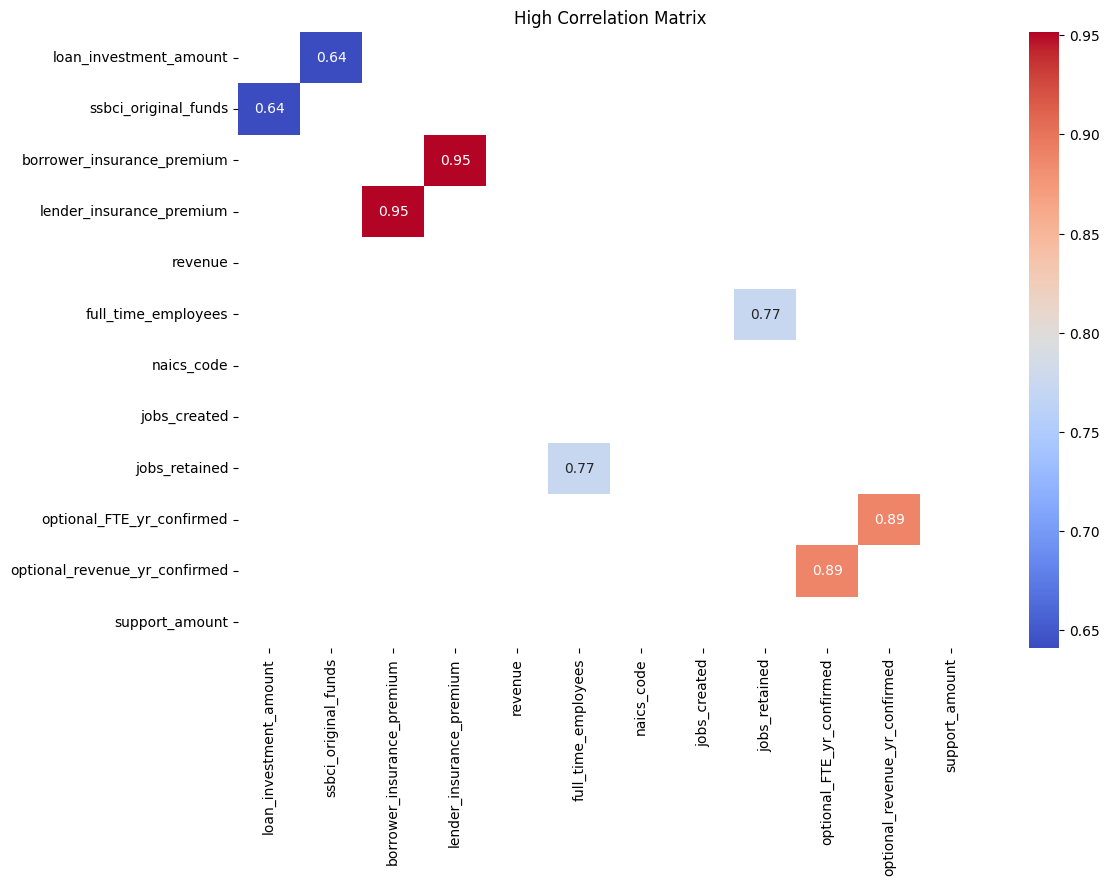

In [206]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Filter correlation matrix to show only values over 0.7
high_correlation_matrix = correlation_matrix[(correlation_matrix > 0.6) & (correlation_matrix < 1.0)]

# Plot heatmap of high correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('High Correlation Matrix')
plt.show()

In [208]:
# Drop the specified columns
columns_to_drop = [ 'optional_FTE_yr_confirmed', 'jobs_retained','ssbci_original_funds','borrower_insurance_premium']
df.drop(columns=columns_to_drop, inplace=True)

In [209]:
print("Remaining columns:",df.columns)
print("Number of Remaining columns:",len(df.columns))

Remaining columns: Index(['unique_id', 'disbursement_date', 'loan_investment_amount',
       'lender_insurance_premium', 'metro_type', 'LMI_type', 'revenue',
       'full_time_employees', 'naics_code', 'jobs_created',
       'lender_type_category', 'optional_primary_use_of_funds',
       'optional_revenue_yr_confirmed', 'optional_stage', 'active_status',
       'support_amount'],
      dtype='object')
Number of Remaining columns: 16


## DATA SPLITING

In [211]:
# import pandas as pd


# # Assuming 'df' is your DataFrame and 'employees' is the column containing the number of employees
# # Filtering the dataset
# filtered_df = df[(df['full_time_employees'] < 15) ]  
# filtered_df2 = df[(df['full_time_employees'] >= 15) ]  

# # Counting the occurrences
# num_companies = len(filtered_df)

# print("Number of companies with less than 15 employees", len(df)-num_companies)
# print("Number of companies with more than 15 employees", num_companies)
# print("Number of companies  ", len(df))

# filtered_df.to_csv('../Datasets/Companies/SmallCompanies.csv', index=False)
# filtered_df2.to_csv('../Datasets/Companies/MediumBigCompanies.csv', index=False)




Number of companies with less than 15 employees 3378
Number of companies with more than 15 employees 18584
Number of companies   21962
